In [ ]:
from tensorflow import keras
print('keras: ', keras.__version__)

keras:  2.12.0


**Load Data**

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Label	Description:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

https://github.com/zalandoresearch/fashion-mnist


In [1]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

**Data Preprocessing**

In [5]:
from tensorflow.keras.utils import to_categorical

x_train = train_images.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255

x_test = test_images.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
y_train.shape

(60000, 10)

**Build the Model**

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [10]:
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['acc'])

**Train the Model**

In [11]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 57s 120ms/step - loss: 0.6509 - acc: 0.7573
Epoch 2/5
469/469 [==============================] - 64s 136ms/step - loss: 0.3851 - acc: 0.8601
Epoch 3/5
469/469 [==============================] - 61s 129ms/step - loss: 0.3208 - acc: 0.8816
Epoch 4/5
469/469 [==============================] - 56s 119ms/step - loss: 0.2847 - acc: 0.8955
Epoch 5/5
469/469 [==============================] - 56s 119ms/step - loss: 0.2576 - acc: 0.9058


**Evaluate the Model**

Now let's check that our model performs well on the test set too:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - loss: 0.3035 - acc: 0.8907 - 4s/epoch - 12ms/step


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.8906999826431274


**Apply the Model**

Pick a test image by choosing index number and take a look at how the model make the prediction.

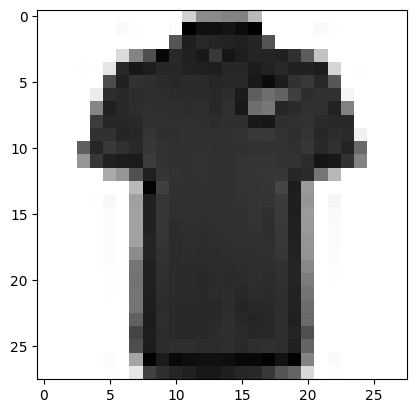

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

index = 908 # 0 to 9999
plt.imshow(test_images[index], cmap=plt.cm.binary)
plt.show()

In [ ]:
pred = model.predict(x_test[index].reshape(1,28,28,1))
print('the prediction is: ', pred.argmax())
print('detailed probability distribution: \n', pred)

1/1 [==============================] - 0s 118ms/step
the prediction is:  0
detailed probability distribution: 
 [[8.93783927e-01 1.38707819e-05 1.30387850e-03 7.81050039e-05
  5.76843566e-04 3.83875260e-07 1.04116924e-01 2.95117903e-08
  1.25202932e-04 8.77509194e-07]]


Label	Description:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot